### HCI for MineRL agent

1. guidence recommendation
  1. Subtask guidence
      1. Assigning subtask for human-player.
      2. Subtask could be the chain in HDQfD or Markov-controller or hand-crafted chain.
      3. Potential research: Comparing Human-player performance between different provided chains.
  2. speacial action guidence
      1. Assigning special action(s) in the subtask for human-player.
      2. special action contains:
          1. Craft -- [Planke, stick, crafting_table, wooden_pickaxe, etc]: converting raw material
          2. Place -- [item]: placing item(s)
          3. NearbyCraft -- [item]: Craft item(s) when something nearby
          4. Equip -- [item]
      


2. Action recommendation
    1. Assigning action in the subtask for human-player.
    2. For action, things might be a bit complex.
    3. 10 basic actions:

        1. Move -- [forward, back, left, right] 
        2. Camera -- [up, down, left, right] 
        3. Combo -- [forward+jump] 
        4. Attack


### import packages

In [1]:
#HCI controller dependencies
import os
import pprint
import numpy as np

os.chdir("..")
from HCI.HCI_module import HCI_basic_agents,HCI_controller

### Test HCI module (pure subtask and special action version)

In [2]:
# create a dict to simulate the inventory dict in the real experiment
cur_state = {
    "inventory":{"log": 0, 
                 "planks": 0,
                 "crafting_table": 0,
                 "stick": 0,
                 "wooden_pickaxe": 0,
                 "dirt": 0,
                 "cobblestone": 0,
                 "stone_pickaxe": 0,
                 "furnace": 0,
                 "iron_ore": 0,
                 "iron_ingot": 0,
                 "iron_pickaxe": 0,
                }}

pprint.pprint(cur_state)

{'inventory': {'cobblestone': 0,
               'crafting_table': 0,
               'dirt': 0,
               'furnace': 0,
               'iron_ingot': 0,
               'iron_ore': 0,
               'iron_pickaxe': 0,
               'log': 0,
               'planks': 0,
               'stick': 0,
               'stone_pickaxe': 0,
               'wooden_pickaxe': 0}}


In [3]:
# create an subtask hci_controller first
# you will only need to run this once at the beginning of the experiment
hci = HCI_controller(include_basic_actions = False)

In [4]:
# simulate the experiment, in the real experiment, you will call this function every time when transfering data to the hci_controller
# you can modify the cur_state according to the guildence agent given, then run it again.
hci.give_suggestion(cur_state)

"Welcome to the game! I'm your personal AI assistant, I will give you suggestions to help you play this wonderful game! Now try to collect 5 log."

### Test HCI module (including basic actions for log and cobblestone)

In [5]:
cur_state = {
    "inventory":{"log": 0, 
                 "planks": 0,
                 "crafting_table": 0,
                 "stick": 0,
                 "wooden_pickaxe": 0,
                 "dirt": 0,
                 "cobblestone": 0,
                 "stone_pickaxe": 0,
                 "furnace": 0,
                 "iron_ore": 0,
                 "iron_ingot": 0,
                 "iron_pickaxe": 0,
                }}

pprint.pprint(cur_state)

{'inventory': {'cobblestone': 0,
               'crafting_table': 0,
               'dirt': 0,
               'furnace': 0,
               'iron_ingot': 0,
               'iron_ore': 0,
               'iron_pickaxe': 0,
               'log': 0,
               'planks': 0,
               'stick': 0,
               'stone_pickaxe': 0,
               'wooden_pickaxe': 0}}


In [6]:
# create an subtask hci_controller first
# you will only need to run this once at the beginning of the experiment
# set basic_action_delay larger if you want to provide basic action not every time you call this function
hci = HCI_controller(include_basic_actions = True,basic_action_delay=0)

Building model
Building model
Building model
Building model
Building model
Building model
Building model
Building model


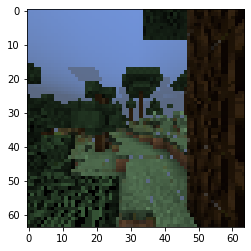

Building model


"Welcome to the game! I'm your personal AI assistant, I will give you suggestions to help you play this wonderful game! Now try to collect 5 log. I recommend you to forward."

In [7]:
# toy case
#load an image to check 
with open('./HCI/test_obs.npy', 'rb') as f:
    obs = np.load(f,allow_pickle=False)
    
import matplotlib.pyplot as plt
plt.imshow(obs)
plt.show()

# simulate the experiment, in the real experiment, you will call this function every time when transfering data to the hci_controller
# you can modify the cur_state according to the guildence agent given, then run it again.
hci.give_suggestion(cur_state,obs=obs)